<center> <h2> California Housing Price Prediction </h2> </center>  

---

### **Importing required libraries**
---

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### **1. Read the “housing.csv”**

In [2]:
data = pd.read_excel('1553768847_housing.xlsx')

### **Displaying top few rows of `data`**

In [3]:
# displaying top 10 rows

data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
5,-122.25,37.85,52,919,213.0,413,193,4.0368,NEAR BAY,269700
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,NEAR BAY,299200
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,NEAR BAY,241400
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,NEAR BAY,226700
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,NEAR BAY,261100


### **Extract `input (X)` and `output (Y)` data from the dataset.**

In [4]:
# X containes all feature except `median_house_value`
X = data.drop('median_house_value', axis=1)

# We want to predict `median_house_value` so our `Y` is median_house_value
Y = data['median_house_value']

### **2. Handle missing values:**
- Filling the missing values with the **`mean`** of the respective column

In [5]:
# Before filling missing values, lets check/visualize columns containing missing values

pd.DataFrame(X.isnull().sum(), columns=['Missing Values Counts'])

,Missing Values Counts
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
ocean_proximity,0


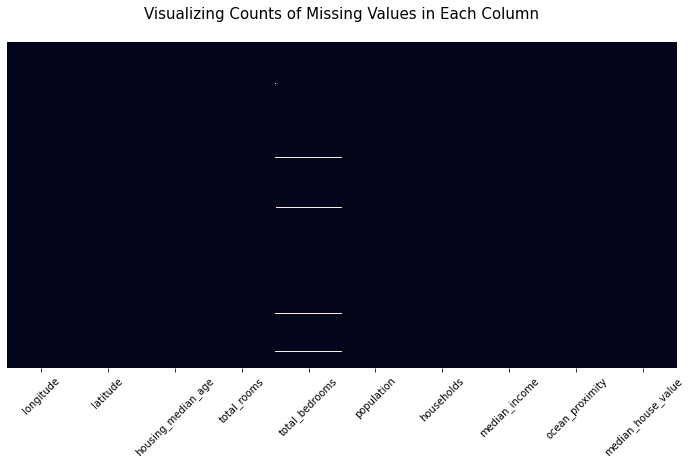

In [18]:
plt.figure(figsize=(12,6))

plt.title("Visualizing Counts of Missing Values in Each Column\n", size=15)
sns.heatmap(data.isnull(), cbar=False, yticklabels=False)
plt.xticks(rotation=45)

plt.show()

In [7]:
missing_percentage = np.round( (X['total_bedrooms'].isnull().sum() * 100) / X.shape[0], 2)

print(f'Percentage of Missing values in `total_bedrooms` is: {missing_percentage} %')

Percentage of Missing values in `total_bedrooms` is: 1.0 %


**From above plot and only `total_bedrooms` containes 1% missing value from whole column, So filling the missing values with the mean**

In [8]:
mean_value = X['total_bedrooms'].mean()

X['total_bedrooms'].fillna(mean_value, inplace=True)

**Now there is no more missing value in our dataset**

### **3. Encode categorical data :**
- Convert **`categorical column`** in the dataset to **`numerical data.`**

In [9]:
# Displaying all categorical column of data

X.select_dtypes('O').columns

Index(['ocean_proximity'], dtype='object')

#### **Only `ocean_proximity` has categorical data, Now checking whether this categorical data is `nominal` or `ordinal`**

In [10]:
X['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

#### **`ocean_proximity`** is **`nominal categorical`** data, So Encoding this using **`one hot encoding`** or **`dummy encoding`**

In [12]:
ocean_proximity_encoded_data = pd.get_dummies(X['ocean_proximity'])
ocean_proximity_encoded_data

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


### **Dropping `ocean_proximity` from `X` and concating `X` and `ocean_proximity_encoded_data`**

In [16]:
X = X.drop('ocean_proximity', axis=1)

X = pd.concat([X, ocean_proximity_encoded_data], axis=1)

#### **Now the `categorical data` is `encoded`**

In [19]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,0,0,0,1,0


### **4. Split the dataset :**
- Split the data into **`80% training`** dataset and **`20% test`** dataset.

In [ ]:
# this will split data into 20% for testing and remaining 80% is for training

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

### **5. Standardize data :**
- Standardize **`training`** and **`test`** datasets.

In [59]:
# creating object of RobustScaler()

scaler = preprocessing.RobustScaler()

In [60]:
# transforming `X_train` and storing in `robust_X_train`
robust_X_train = scaler.fit_transform(X_train)

# transforming `X_test` and storing in `robust_X_test`
robust_X_test = scaler.fit_transform(X_test)

In [61]:
# Overwriting `X_train` with transformed/standarized data of `robust_X_train`
X_train = pd.DataFrame(robust_X_train, columns = X_train.columns)

# Overwriting `X_test` with transformed/standarized data of `robust_X_test`
X_test = pd.DataFrame(robust_X_test, columns = X_test.columns)

**Now the `X_train` and `X_test` is `Standardized`**

### **6. Perform Linear Regression :**
- Performing **`Linear Regression`** on training data.

In [67]:
lr_model = LinearRegression()

In [68]:
lr_model.fit(X_train, y_train)

LinearRegression()

#### **Predicting output for `test dataset` using the `fitted model.`**

In [75]:
y_predicted = lr_model.predict(X_test)
y_predicted

array([412090.43862098, 149228.01517989, 209451.08261842, ...,
       319490.18906012, 326367.18591772, 197426.15172996])

**Model predicted the `median_house_value` of provided `test dataset`**

#### **Print root mean squared error (RMSE) from Linear Regression.**

In [87]:
mse = mean_squared_error(y_test , y_predicted)

rmse = np.sqrt(mse)

In [91]:
print(f"Value if RMSE from Linear Regression model is: {rmse}")

Value if RMSE is: 68251.05932694266


### **7. Perform Decision Tree Regression :**
- Perform **`Decision Tree Regression`** on **`training data.`**

In [92]:
from sklearn.tree import DecisionTreeRegressor

In [93]:
dtr_model = DecisionTreeRegressor()

In [100]:
dtr_model.fit(X_train, y_train)

DecisionTreeRegressor()

#### **Predicting output for `test dataset` using the `fitted model.`**

In [101]:
y_predicted = dtr_model.predict(X_test)
y_predicted

array([500001.,  80200., 211700., ..., 460000., 258000., 193200.])

#### **Print root mean squared error (RMSE) from Decision Tree Regression.**

In [103]:
mse = mean_squared_error(y_test , y_predicted)

rmse = np.sqrt(mse)

In [104]:
print(f"Value of RMSE from Decision Tree Regressor model is: {rmse}")

Value if RMSE from Decision Tree Regressor model is: 77802.40987412701


### **8. Perform Random Forest Regression :**
- Perform **`Random Forest Regression`** on **`training data`**.


In [105]:
from sklearn.ensemble import RandomForestRegressor

In [106]:
rfr_model = RandomForestRegressor()

In [109]:
rfr_model.fit(X_train, y_train)

RandomForestRegressor()

#### **Predicting output for `test dataset` using the `fitted model.`**

In [110]:
y_predicted = rfr_model.predict(X_test)
y_predicted

array([456672.67,  96634.  , 199187.  , ..., 389147.2 , 302602.01,
       161362.  ])

#### **Print root mean squared error (RMSE) from Random Forest Regressor.**

In [112]:
mse = mean_squared_error(y_true = y_test , y_pred = y_predicted)

rmse = np.sqrt(mse)

In [113]:
print(f"Value of RMSE from Decision Tree Regressor model is: {rmse}")

Value of RMSE from Decision Tree Regressor model is: 56520.40988049275


### **9. Bonus exercise: Perform Linear Regression with one independent variable :**
- Extract just the median_income column from the independent variables (from X_train and X_test).

In [119]:
X_train = X_train[['median_income']]
X_test = X_test[['median_income']]

**Perform `Linear Regression` to predict housing values based on `median_income.`**

In [120]:
lr_model = LinearRegression()

In [124]:
lr_model.fit(X_train, y_train)

LinearRegression()

**Predict output for test dataset using the fitted model.**

In [126]:
y_predicted = lr_model.predict(X_test)
y_predicted

array([448909.52038115, 206238.57943927, 227123.96671872, ...,
       243945.35435657, 314006.83771758, 153840.19075485])

#### **Print root mean squared error (RMSE)**

In [138]:
mse = mean_squared_error(y_true = y_test , y_pred = y_predicted)

rmse = np.sqrt(mse)

In [139]:
print(f"Value of RMSE from Linear regression model is: {rmse}")

Value of RMSE from Linear regression model is: 83132.21099274627
